# Machine Learning

With the data scraped, cleaned, and analyzed, I can build and evaluate a recomender.

In [187]:
# data manipulation
import numpy as np
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# machine learning
from surprise import Reader
from surprise import Dataset

from surprise import KNNBasic, KNNWithMeans, KNNWithZScore

from surprise import NormalPredictor, SVD, NMF

from surprise.model_selection import cross_validate
from surprise import accuracy

In [188]:
# import and preview data
reviews_df = pd.read_csv('basenotes_reviews_df_clean.csv')

reviews_df.head(3)

,rating_value,review_id,user_id,user_name,user_location,scent_id,scent_name,review_text,scent_brand
0,2.0,232695,13378905,Sniffers,United States,26133451.0,Cendres de Thé,On opening I get a cardamom smelling tea with ...,Phaedon
1,1.0,232691,1361,drseid,United States,26158904.0,Salted Green Mango,Salted Green Mango opens with subdued bitter o...,Strangers Parfumerie
2,2.0,232688,26195006,speedracer,United States,26161313.0,Nuit d'Issey Polaris,"Spicy-warm vanilla, green cypress and slightly...",Issey Miyake


I'm including a random predictor as a baseline model and comparing with SVD and NMF models.

In [189]:
# instantiate models
random_pred = NormalPredictor()
svd = SVD()
nmf = NMF()

reader = Reader(rating_scale=(1,3))

data = Dataset.load_from_df(reviews_df[['user_id', 'scent_id', 'rating_value']], reader)

random_results = cross_validate(random_pred, data, measures=['RMSE'], cv=5)
svd_results = cross_validate(svd, data, measures=['RMSE'], cv=5)
nmf_results = cross_validate(nmf, data, measures=['RMSE'], cv=5)

Average RMSE
    Random: 0.92
    SVD: 0.68
    NMF: 0.74


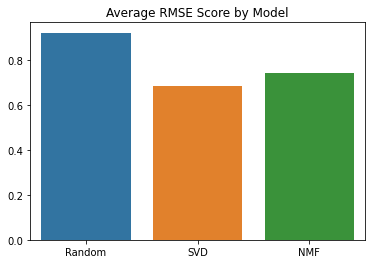

In [190]:
# compare RMSE
random_avg_rmse = random_results['test_rmse'].mean()
svd_avg_rmse = svd_results['test_rmse'].mean()
nmf_avg_rmse = nmf_results['test_rmse'].mean()

print(f"Average RMSE\n\
    Random: {random_avg_rmse:.2f}\n\
    SVD: {svd_avg_rmse:.2f}\n\
    NMF: {nmf_avg_rmse:.2f}")

models = ['Random', 'SVD', 'NMF']
rmse_scores = [random_avg_rmse, svd_avg_rmse, nmf_avg_rmse]

sns.barplot(models, rmse_scores)
plt.title('Average RMSE Score by Model')
plt.show()

Average fit time
    Random: 0.21
    SVD: 7.54
    NMF: 9.59


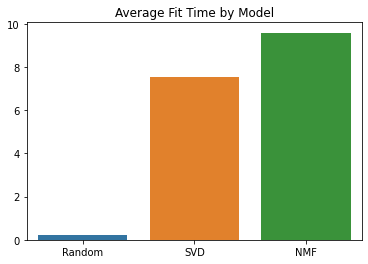

In [191]:
# compare fit time
random_avg_fit_time = np.array(random_results['fit_time']).mean()
svd_avg_fit_time = np.array(svd_results['fit_time']).mean()
nmf_avg_fit_time = np.array(nmf_results['fit_time']).mean()

print(f"Average fit time\n\
    Random: {random_avg_fit_time:.2f}\n\
    SVD: {svd_avg_fit_time:.2f}\n\
    NMF: {nmf_avg_fit_time:.2f}")

models = ['Random', 'SVD', 'NMF']
fit_times = [random_avg_fit_time, svd_avg_fit_time, nmf_avg_fit_time]

sns.barplot(models, fit_times)
plt.title('Average Fit Time by Model')
plt.show()

The SVD model had a lower RMSE and a faster fit time.

In [192]:
user_ids = reviews_df['user_id'].unique()
scent_ids = reviews_df['scent_id'].unique() 

In [297]:
def top_n_recommendations(n, user_id):
    '''Return the top n recommendations for a given user ID.'''
    predictions = [svd.predict(uid=user_id, iid=scent) for scent in scent_ids]
    
    predictions_df = pd.DataFrame(predictions, columns=['uid', 'iid', 'r_ui', 'est', 'details'])
    
    scent_name_list =[]
    
    for i in predictions_df['iid']:
        scent_name_list.append(reviews_df[reviews_df['scent_id'] == i]['scent_name'].values[0])
        
    predictions_df['scent_name'] = scent_name_list
    
    print('Top 3 recommended scents:')
    for i in predictions_df.sort_values('est', ascending=False)[:3]['scent_name'].values:
        print(i)

In [298]:
top_n_recommendations(3, 13378905)

Top 3 recommended scents:
S.T. Dupont Homme
Thallium
Avant Garde
